In [1]:
import sys

sys.path.append("/home/ji-liu/GitHub/off_road_nav")

# Test polar grid bev visualization

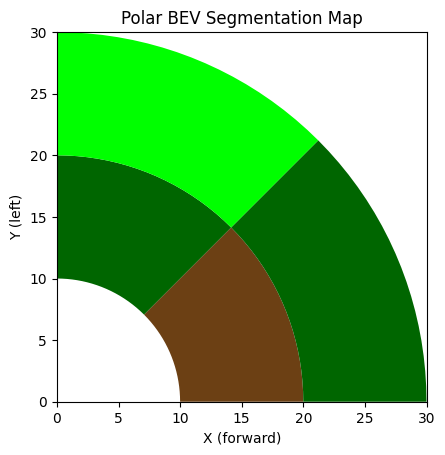

In [ ]:
import numpy as np
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_bev_polar

polar_bev_map = np.array([[1, 3], [3, 4]])
bev_config = {}
bev_config["angle_edges"] = np.array([0, np.pi / 4, np.pi / 2])
bev_config["radial_edges"] = np.array([10, 20, 30])
visualize_bev_polar(polar_bev_map, bev_config)


INFO     - 2025-11-17 15:24:06 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00000: 1 frames


Sequence 00000:   0%|          | 0/1 [00:00<?, ?it/s]

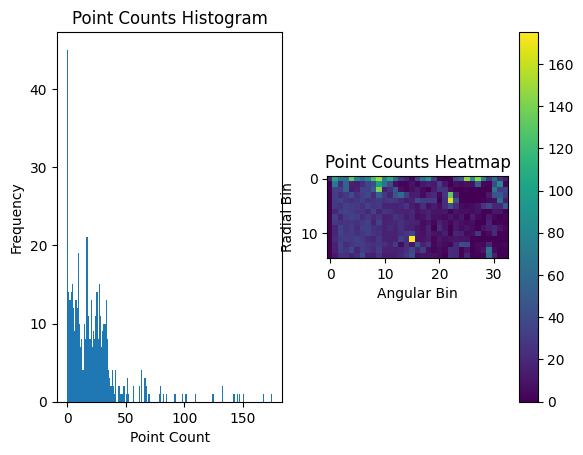

Sequence 00000: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


In [2]:
from offroad_det_seg_rellis.dataset.bev_segmentation import process_sequence

polar_config = {
    "n_angle_bins": 15,
    "radial_mode": "linear",
    "radial_growth_rate": 0.1,
    "radial_min": 4.0,
    "radial_max": 25.0,
    "fov_add_margin": 0.1,
}

process_sequence(
    sequence_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00000",
    filter_camera_fov=True,
    grid_type="polar",
    config=polar_config,
    frame_indices=[104],
    show_point_counts_hist=True,
)



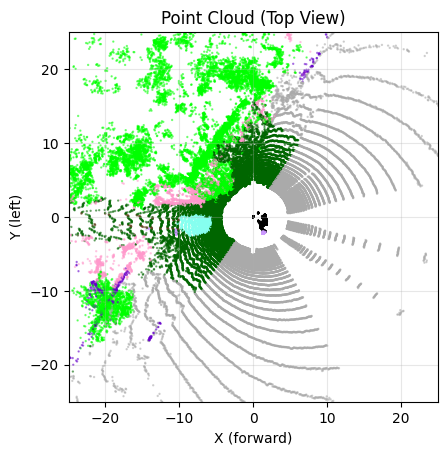

In [ ]:
from offroad_det_seg_rellis.dataset.rellis_sequence import get_rellis_sequence
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_point_cloud_bev
# visualize the actual point cloud first
sequence = get_rellis_sequence(
    sequence_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00000",
    load_vel2os1=False,
)

points = sequence.get_lidar_points(frame_idx=104)
labels = sequence.get_lidar_label(frame_idx=104)

visualize_point_cloud_bev(points, labels, show=True)


In [6]:
import numpy as np
np.max(labels)

np.int64(18)

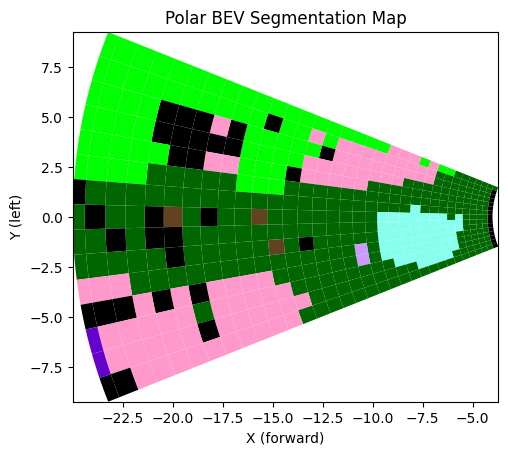

In [7]:
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_bev_polar
from offroad_det_seg_rellis.dataset.bev_segmentation import load_bev_map, load_bev_seg_config


polar_bev_map = load_bev_map(
          data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
          sequence_id="00000",
          grid_type="polar",
          frame_idx=104,
      )

bev_config =bev_config=load_bev_seg_config(
        data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
        sequence_id="00000",
        grid_type="polar",
    )
    
visualize_bev_polar(
    bev_map=polar_bev_map,
    bev_config=bev_config,
)


In [8]:
np.max(polar_bev_map)

np.int32(18)

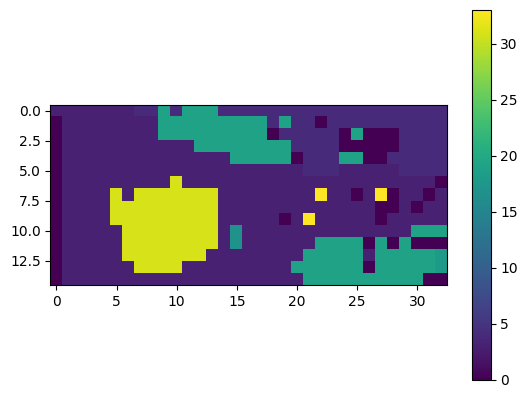

In [41]:
import matplotlib.pyplot as plt
plt.imshow(polar_bev_map)
plt.colorbar()
plt.show()


In [16]:
len(bev_config["radial_edges"])

42

In [74]:
cartesian_config = {
    "x_range": (-25.0, 25.0),
    "y_range": (-25.0, 25.0),
    "resolution": 0.25,
}

process_sequence(
    sequence_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00000",
    filter_camera_fov=True,
    grid_type="cartesian",
    config=cartesian_config,
    frame_indices=[104],
)

INFO     - 2025-11-09 19:42:46 - bev_segmentation.py:494 - process_sequence() - Processing sequence 00000: 1 frames


Sequence 00000: 100%|██████████| 1/1 [00:00<00:00, 16.86it/s]


found label 0
found label 3
found label 4
found label 17
found label 18
found label 19
found label 31
found label 33


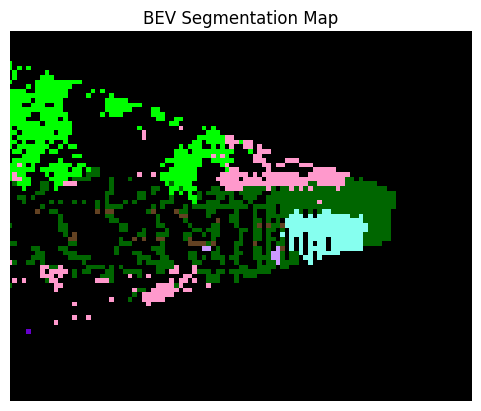

In [76]:
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_bev_cartesian
cartesian_bev_map = load_bev_map(
    data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00000",
    grid_type="cartesian",
    frame_idx=104,
)
visualize_bev_cartesian(
    bev_map=cartesian_bev_map,
    create_new_figure=True,
    show=False,
)

plt.xlim(0,100)
plt.ylim(60,140)
plt.show()


# Do actual BEV segmentation map generation







In [9]:
from offroad_det_seg_rellis.dataset.bev_segmentation import process_sequence

sequence_root = "/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D"
sequence_id_list = ["00000", "00001", "00002", "00003", "00004"]

polar_config = {
    "n_angle_bins": 15,
    "radial_mode": "linear",
    "radial_growth_rate": 0.1,
    "radial_min": 4.0,
    "radial_max": 25.0,
    "fov_add_margin": 0.1,
}
for sequence_id in sequence_id_list:
    process_sequence(
        sequence_root=sequence_root,
        sequence_id=sequence_id,
        filter_camera_fov=True,
        grid_type="polar",
        config=polar_config,
    )

INFO     - 2025-11-17 15:26:44 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00000: 2847 frames


Sequence 00000: 100%|██████████| 2847/2847 [04:07<00:00, 11.49it/s]

INFO     - 2025-11-17 15:30:52 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00001: 2319 frames



Sequence 00001: 100%|██████████| 2319/2319 [03:29<00:00, 11.09it/s]


INFO     - 2025-11-17 15:34:21 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00002: 4147 frames


Sequence 00002: 100%|██████████| 4147/4147 [05:41<00:00, 12.13it/s]

INFO     - 2025-11-17 15:40:03 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00003: 2184 frames



Sequence 00003: 100%|██████████| 2184/2184 [02:42<00:00, 13.42it/s]

INFO     - 2025-11-17 15:42:45 - bev_segmentation.py:509 - process_sequence() - Processing sequence 00004: 2059 frames



Sequence 00004: 100%|██████████| 2059/2059 [02:22<00:00, 14.45it/s]


# Pick a file from a different sequence and verify the generation

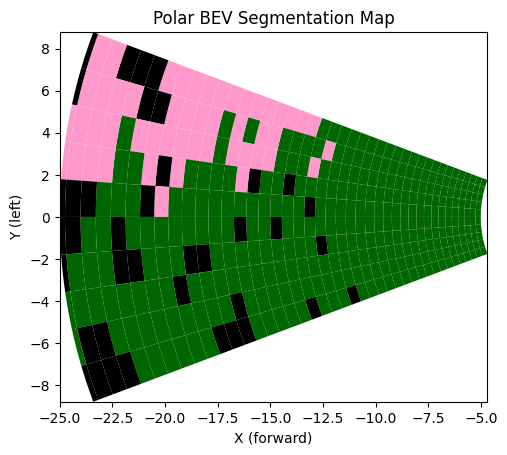

In [18]:
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_bev_polar
from offroad_det_seg_rellis.dataset.bev_segmentation import load_bev_map

bev_map = load_bev_map(
    data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00001",
    grid_type="polar",
    frame_idx=93,
)
bev_config = load_bev_seg_config(
    data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00001",
    grid_type="polar",
)
visualize_bev_polar(
    bev_map=bev_map,
    bev_config=bev_config,
)

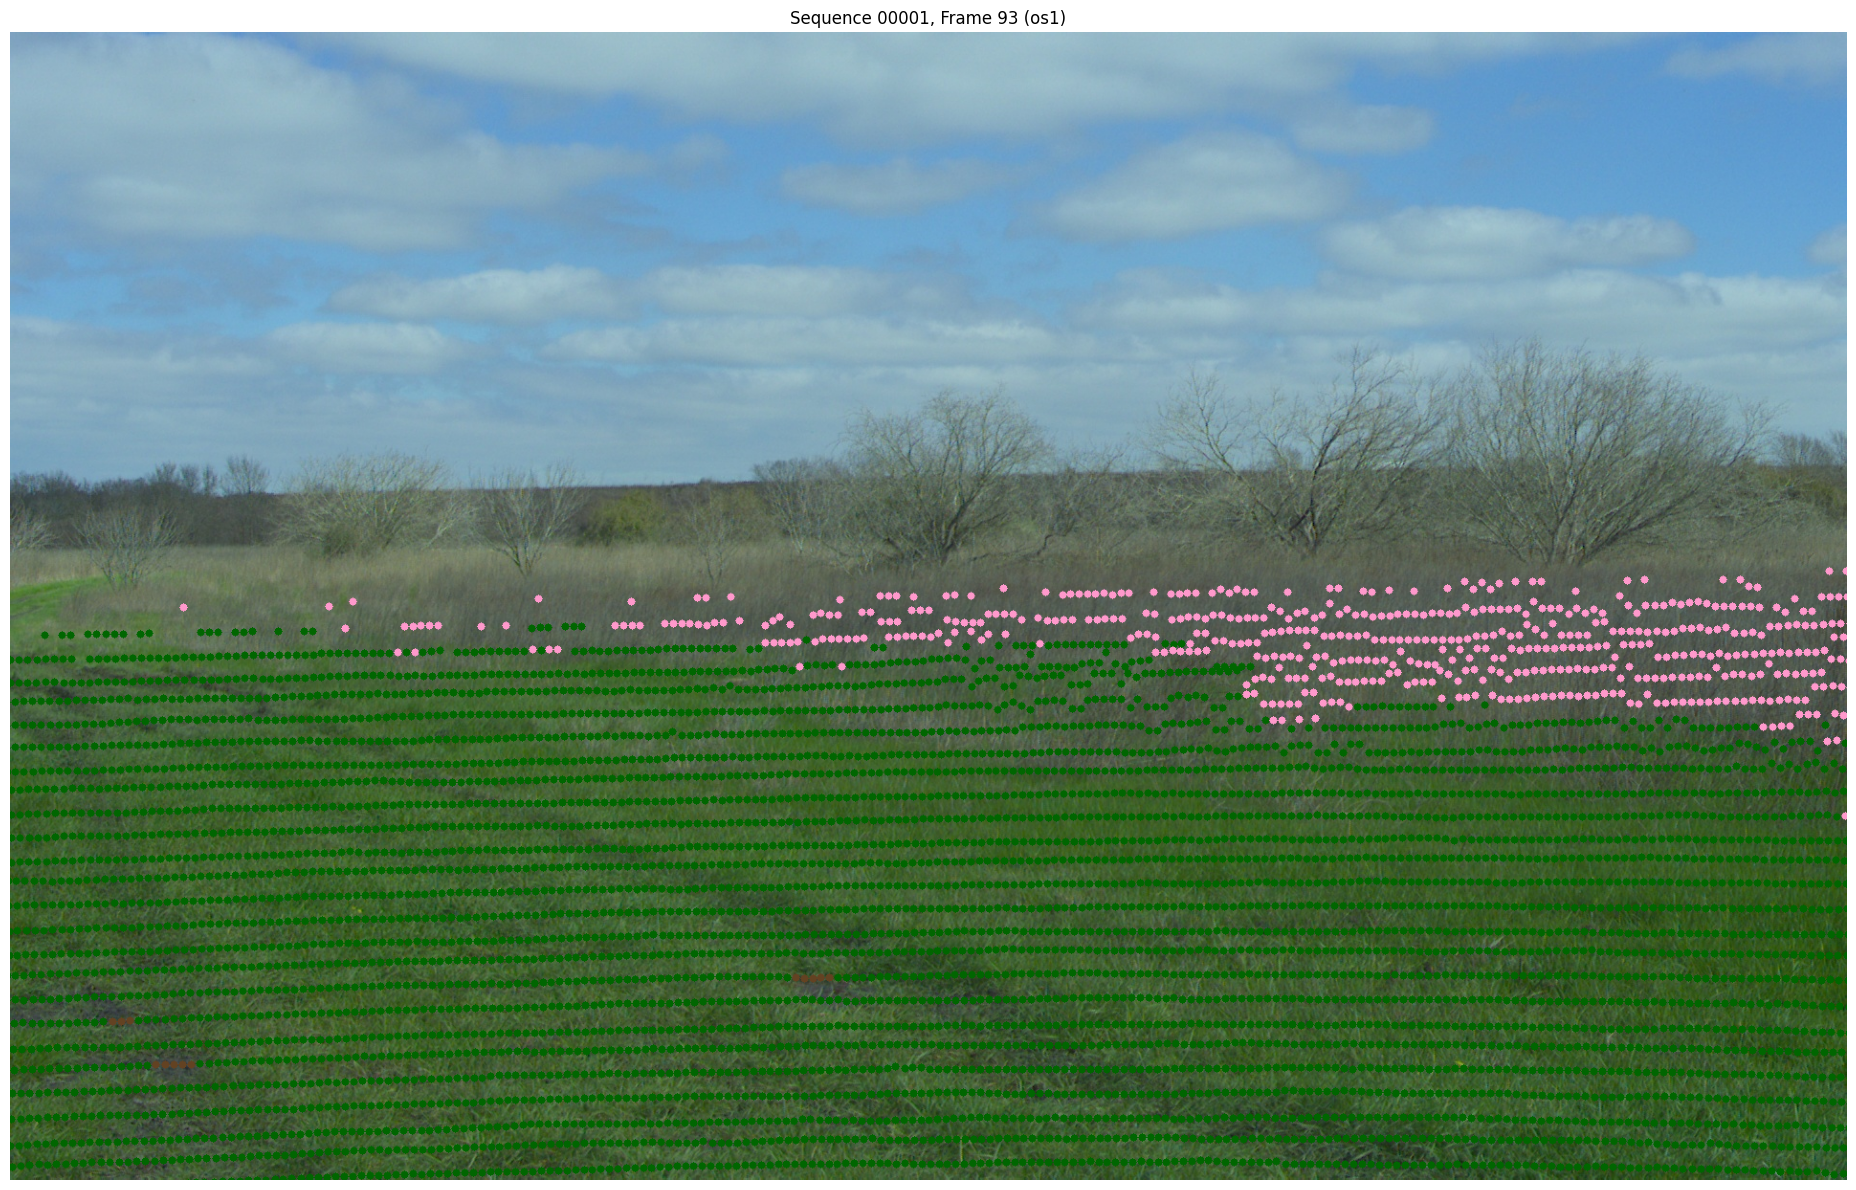

array([[[127, 162, 192],
        [128, 163, 193],
        [127, 162, 192],
        ...,
        [131, 171, 197],
        [131, 173, 198],
        [131, 173, 198]],

       [[127, 162, 192],
        [128, 163, 193],
        [127, 162, 192],
        ...,
        [131, 171, 197],
        [131, 173, 198],
        [131, 173, 198]],

       [[128, 163, 193],
        [128, 163, 193],
        [127, 162, 192],
        ...,
        [130, 170, 196],
        [129, 171, 196],
        [130, 172, 197]],

       ...,

       [[ 65, 107,  67],
        [ 64, 105,  61],
        [ 62, 100,  49],
        ...,
        [ 48,  89,  49],
        [ 40,  82,  44],
        [ 36,  80,  44]],

       [[ 65, 105,  68],
        [ 66, 107,  65],
        [ 61,  98,  54],
        ...,
        [ 49,  91,  51],
        [ 39,  85,  46],
        [ 35,  86,  45]],

       [[ 65, 105,  68],
        [ 64, 105,  65],
        [ 63, 100,  57],
        ...,
        [ 45,  90,  49],
        [ 39,  87,  47],
        [ 36,  89,  47]]

In [92]:
from offroad_det_seg_rellis.dataset.lidar_projection import visualize_lidar_on_image
from offroad_det_seg_rellis.dataset.rellis_sequence import get_rellis_sequence
sequence = get_rellis_sequence(
    sequence_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
    sequence_id="00001",
    load_vel2os1=False,
)
visualize_lidar_on_image(
    sequence=sequence,
    frame_idx=93,
    point_size=4,
)
